In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Práctica 2 regresión lineal

## Regresión lineal paso a paso

In [2]:
# Generamos datos
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

print(X)
print(y)

[[0.74908024]
 [1.90142861]
 [1.46398788]
 [1.19731697]
 [0.31203728]
 [0.31198904]
 [0.11616722]
 [1.73235229]
 [1.20223002]
 [1.41614516]
 [0.04116899]
 [1.9398197 ]
 [1.66488528]
 [0.42467822]
 [0.36364993]
 [0.36680902]
 [0.60848449]
 [1.04951286]
 [0.86389004]
 [0.58245828]
 [1.22370579]
 [0.27898772]
 [0.5842893 ]
 [0.73272369]
 [0.91213997]
 [1.57035192]
 [0.39934756]
 [1.02846888]
 [1.18482914]
 [0.09290083]
 [1.2150897 ]
 [0.34104825]
 [0.13010319]
 [1.89777107]
 [1.93126407]
 [1.6167947 ]
 [0.60922754]
 [0.19534423]
 [1.36846605]
 [0.88030499]
 [0.24407647]
 [0.99035382]
 [0.06877704]
 [1.8186408 ]
 [0.51755996]
 [1.32504457]
 [0.62342215]
 [1.04013604]
 [1.09342056]
 [0.36970891]
 [1.93916926]
 [1.55026565]
 [1.87899788]
 [1.7896547 ]
 [1.19579996]
 [1.84374847]
 [0.176985  ]
 [0.39196572]
 [0.09045458]
 [0.65066066]
 [0.77735458]
 [0.54269806]
 [1.65747502]
 [0.71350665]
 [0.56186902]
 [1.08539217]
 [0.28184845]
 [1.60439396]
 [0.14910129]
 [1.97377387]
 [1.54448954]
 [0.39

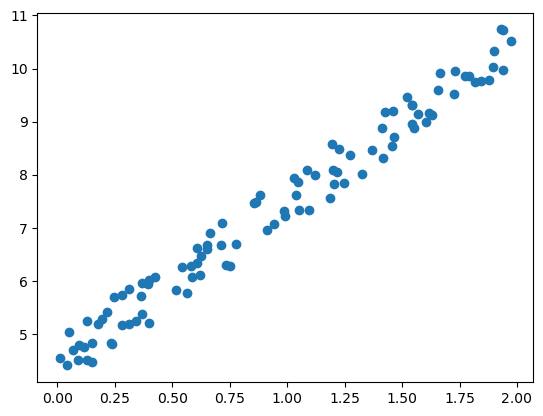

In [3]:
plt.scatter(X,y)
plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X]

#Resolvemos sistema de optimilidad
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(f"theta_best = {theta_best}")

theta_best = [[4.51359766]
 [2.98323418]]


In [5]:
# definimos el modelo de predicción

def model_predict(x):
    y_hat = theta_best[0] + theta_best[1] * x
    return y_hat

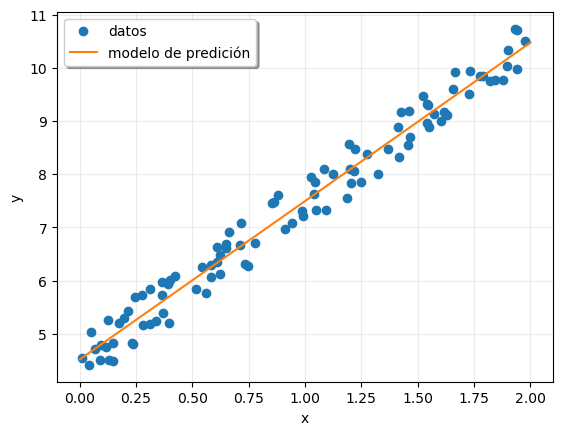

In [12]:
plt.plot(X, y, 'o', label='datos')
x = np.linspace(0, 2, 100)
y_predict = model_predict(x)
plt.plot(x, y_predict, label='modelo de predición')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.show()


### Regresión lineal en numpy

In [7]:
theta_best_svd, residuals, rankm, s = np.linalg.lstsq(X_b.T.dot(X_b), X_b.T.dot(y))
print(f"theta_best_svd = {theta_best_svd}")

theta_best_svd = [[4.51359766]
 [2.98323418]]


/tmp/ipykernel_7114/3516919599.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta_best_svd, residuals, rankm, s = np.linalg.lstsq(X_b.T.dot(X_b), X_b.T.dot(y))


In [8]:
theta_best_pinv = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(f"theta_best = {theta_best}")

theta_best = [[4.51359766]
 [2.98323418]]


### regresión lineal con scikit-learn

In [9]:
from sklearn.datasets import make_regression
from sklearn import linear_model

X_train, y_train = make_regression(n_samples=1000, n_features=10, random_state=2)
print(X_train)
print(y_train)

[[-0.81718759  1.07112401 -1.28693243 ...  0.98596949 -0.04193959
  -0.63736775]
 [ 0.54768973  0.26228202  0.32559834 ...  2.21722404  0.3020932
  -0.75406351]
 [-0.37758078  1.03844388  0.41173408 ...  1.9939162  -0.34652158
   1.00031085]
 ...
 [ 0.10995101  0.14834924 -0.37151912 ...  0.59982043 -0.65354144
   3.16096597]
 [ 1.04280504 -0.24397999 -1.50773238 ...  0.60683991 -0.20937571
  -1.10993298]
 [ 0.91368577 -1.80008733  0.02979317 ...  0.42599291  1.13567411
  -0.16279356]]
[-1.96540260e+02  9.92964983e+01  1.07985607e+02  2.94627178e+02
 -1.36259044e+02  1.40705944e+02  7.98399903e+01  8.80643467e+01
 -1.39326256e+02  1.39212074e+01 -1.76546809e+02 -2.46664840e+02
 -2.29733732e+01  4.47307291e+01  1.18452959e+02  1.26558785e+02
 -3.59485083e+00  2.21009255e+02  2.03689417e+02 -1.64449829e+02
 -2.05215028e+01  2.02224799e+02  7.96236887e+01  7.54442269e+01
  1.03436082e+02 -1.26359041e+02  8.18506002e+01  8.49015018e+00
  3.05216547e+01  9.45657463e+01 -3.80026453e+01 -1.17

In [10]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print(f"Coeficientes = \n {regr.coef_}")

Coeficientes = 
 [13.2738953  21.55603124 28.29007558 19.97642753 92.81820866 32.95694365
 10.35499589 54.71843968 60.0455139  16.8968717 ]
